# Defining Random Variables

### Introduction

Now so far, we have seen how we can learn about a variable by plotting either a frequency distribution, and exploring summary statistics, or exploring the same information with a sample from the population.

As we mentioned, in most circumstances, using a sample of the population is the best that we can do, as it is simply too costly to survey the entire population.  As we'll see in this lesson, just using a sample of the population can lead us to some illogical conclusions, so instead we prefer to use the sample, to build a model of what we believe to be the distribution.

### Loading the data

Ok let's load up our data.

In [3]:
import pandas as pd 
url = "https://raw.githubusercontent.com/jigsawlabs-student/modeling-distributions/master/scores_grade_eight_2015.csv"
df = pd.read_csv(url, index_col = 0)

In [4]:
df.shape

(472, 8)

In [5]:
df[:3]

,DBN,School Name,Number Tested,Mean Scale Score,# Level 1,# Level 2,# Level 3,# Level 4
53,01M034,P.S. 034 FRANKLIN D. ROOSEVELT,59,298.0,21.0,24.0,9.0,5.0
136,01M140,P.S. 140 NATHAN STRAUS,58,285.0,28.0,26.0,4.0,0.0
169,01M184,P.S. 184M SHUANG WEN,56,360.0,0.0,4.0,13.0,39.0


From here, we can use numpy to select a sample from our dataframe.

In [6]:
sample_df = df.sample(n = 100, random_state = 5)

In [7]:
sample_df[:3]

,DBN,School Name,Number Tested,Mean Scale Score,# Level 1,# Level 2,# Level 3,# Level 4
13675,31R027,I.S. 027 ANNING S. PRALL,385,295.0,158.0,133.0,63.0,31.0
6491,14K318,I.S. 318 EUGENIO MARIA DE HOSTOS,328,289.0,116.0,184.0,27.0,1.0
10264,24Q061,I.S. 061 LEONARDO DA VINCI,768,295.0,295.0,318.0,102.0,53.0


### Exploring the data

Ok, now let's say that we one of our siblings, Michelle, is considering a move to NYC, and that they currently live in Albany.  They want to make sure that if they move, that their child, Emmet, in middle school, doesn't go to a significantly worse school.

They ask us to do some analysis.

To start off we can plot the distribution of math scores in the city for 2015.

In [8]:
avg_score = sample_df['Mean Scale Score']

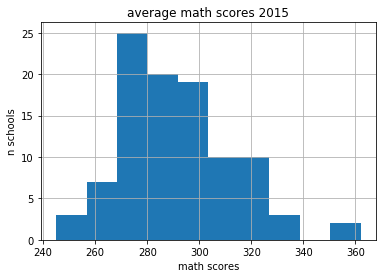

In [9]:
import matplotlib.pyplot as plt
ax = avg_score.hist()
ax.set(title = 'average math scores 2015', xlabel = 'math scores', ylabel = "n schools")
plt.show()

Now what we have above is a frequency distribution.  It's our histogram, that shows us the frequency of each score appearing in our sample.

An equivalent is our `value_counts` method from pandas.

In [10]:
avg_score.value_counts().iloc[:3]

295.0    5
279.0    5
283.0    4
Name: Mean Scale Score, dtype: int64

Ok, now let's take a look at the mean and standard deviation of the mean scale score in NYC.

In [11]:
avg_score = sample_df['Mean Scale Score']

In [12]:
avg_score.mean()

291.4343434343434

In [13]:
avg_score.std()

21.460529320060488

Ok, so there's a mean of 291 in NYC and a standard deviation of 21.46.

We can also plot a histogram of this data, which looks like the following.

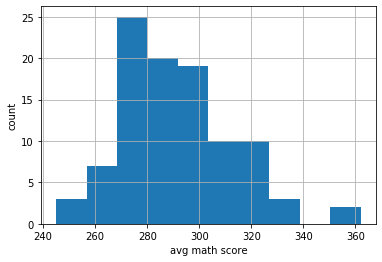

In [16]:
import matplotlib.pyplot as plt

ax = avg_score.hist()
ax.set(xlabel = 'avg math score', ylabel = 'count')
pdf_fig = plt.gcf()

And if we want to turn this into probabilities we can do just pass the argument `density = True` to our `hist` function. 

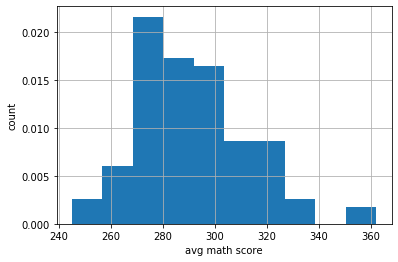

In [17]:
import matplotlib.pyplot as plt

ax = avg_score.hist(density = True)
ax.set(xlabel = 'avg math score', ylabel = 'count')
pdf_fig = plt.gcf()

### Defining some Terms

Now Emmet's current middle school in Albany has an average math score of 310.  And before moving to NYC, Michelle wants to get a sense of what Emmet's school's score will be. Statisticians would frame this question consisting of the following:

1. An experiment/trial
* The assignment of Emmet to a school is called an *experiment* or *trial*.

> In probability theory, an **experiment or trial** is any procedure that can be infinitely repeated and has a well-defined set of possible outcomes.

2. An outcome
* The average math score of Emmet's school is called an outcome.
> An outcome is the result of an experiment.

3. Sample space
> The sample space is the set of all possible outcomes to an experiment.

* So the set of all possible average scores Emmet's school can have is the sample space of the experiment.  The range of scores on the test is between 148 and 423, so the average score Emmet's school can have is any number in between.

* $\Omega = [148, 423]$

> Capital omega is used to represent the probability space.  The square brackets mean the range is inclusive.  To represent exclusive, rounded brackets can be used. $\Omega = [148, 423)$ means 148 to 423, but not including 423.

4. Continuous or Discrete

It's useful to get a sense of if the sample space is continuous or discrete.  

<img src="./discrete-cont-side.png" width="50%">

A. Discrete 
* A sample space is **discrete** if there are *countably many outcomes*.  
The number of shots a basketball player makes in a game is discrete.  A basketball player can make 20 shots, but not 20.1, or 35.9.

B. Continuous

* A sample space is **continous** if the set of outcomes consists of any value between the minimum value and maximum value in the sample space.

For example, the weight of an individual is continous.  It can take on any value above zero.  It's the same thing for the height.  Here, because we our sample space consists of the set of the *average scores* Emmet's school can have, this sample space is continuous. 

### Probability distributions and Random Variable

The average math score of Emmet's assigned school is an example of a *random variable*.

> A **Random variable** is described informally as a variable whose values depend on outcomes of a random phenomenon. - [Wikipedia](https://en.wikipedia.org/wiki/Random_variable)

Random variables occur all over the place.  For example, if we want to see get a sense of how tall a newborn may grow to be, we know one component of this is due to random chance.  And therefore this another example of a random variable.  Here, the average math score of Emmet's assigned school is an example of a random variable.

> Once more a **Random variable** is described a variable whose values depend on outcomes of a random phenomenon.

Let's represent this random variable as $X$.

> $X = $  the math score of Emmet's assigned school.

Now we can ask questions of the random variable.  For example, if we want to ask the the probability that Emmet's school's score is 310, we would say:

* $P(X = 310)$

And the probability that the school's score is 300 is:

* $P(X = 300)$

Now to represent the probability of that this random variable takes on any value in the sample space, we use the probability distribution function:

> The **probability distribution function** of a random variable is a mathematical function that provides the probabilities of occurrence of different possible outcomes in that random variable.

> If our random variable is continuous, we call this the **probability density funtion**.

To show the probability distribution function our defined random variable $X$ above, we can simply plot the different math average math scores a school in NYC can take, and the probability of each score.

> Here we'll just look to our sample to get those probabilities.

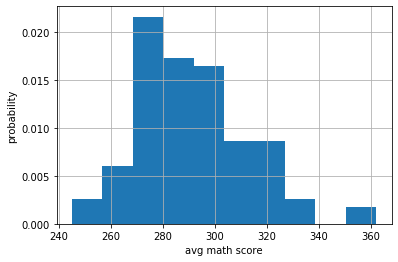

In [18]:
import matplotlib.pyplot as plt

ax = avg_score.hist(density = True)
ax.set(xlabel = 'avg math score', ylabel = 'probability')
pdf_fig = plt.gcf()

> The key line is: `ax = avg_score.hist(density = True)`

So the above is a plot of the probability distribution function for our random variable $X$.  Let's make sure that we can interpret the above.  Across the bottom are the range of values in our sample space and vertically we are representing the corresponding probability of each outcome.

So we can read the graph above as saying there's a $.21$ probability that Emmet's school's math score is 300.

* $P(X = 300) = .21$

How did we get the probability distribution above.  We just took counts of all the values (our frequency distribution), and divided it by the size of our sample.  We can call this our **relative frequencies**.

> Pandas can do this for us.

In [23]:
avg_score.value_counts(normalize = True).sort_index().iloc[:10]

245.0    0.010101
250.0    0.010101
254.0    0.010101
259.0    0.010101
262.0    0.010101
264.0    0.030303
265.0    0.010101
266.0    0.010101
269.0    0.030303
270.0    0.010101
Name: Mean Scale Score, dtype: float64

So this is just our probability distribution function again, this time in a table form (as opposed to a graph).  The value and the corresponding probability.  The return value from the `value_counts(normalize=True)` also returns to us our probability distribution function for a random variable.

> Every outcome in the sample space that is not that is not listed, we can set equal to zero.

Now that in calling this our probability distribution function, we are making a pretty large assumption - that these relative frequencies in our sample are also the probabilities of occurrence in the future.  But for now, it's ok.    

### Summary

In this lesson we learned about random variables.  A random variable as a variable whose values depend on outcomes of a random phenomenon.  A random variable has a sample space, which is the set of all possible outcomes.  And that sample space can be either continuous or discrete.  

A sample space is continous if the set of outcomes consists of any value between the minimum value and maximum value in the sample space.   A sample space is discrete if there are countably many outcomes. 

<img src="./discrete-cont-side.png" width="30%">

Here, we defined our random variable $X$ where $X = $  the math score of Emmet's assigned school.

Each random variable has a probability distribution function, which is a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment.  Here, we used the relative frequencies in our random sample to define the probability distribution function.

In [25]:
avg_score.value_counts(normalize = True).sort_index().iloc[:10]

245.0    0.010101
250.0    0.010101
254.0    0.010101
259.0    0.010101
262.0    0.010101
264.0    0.030303
265.0    0.010101
266.0    0.010101
269.0    0.030303
270.0    0.010101
Name: Mean Scale Score, dtype: float64

Or in graph form:

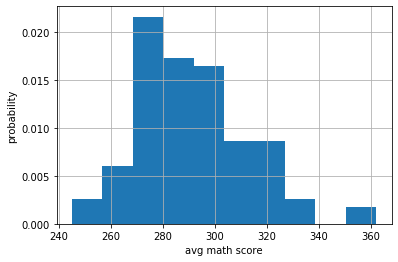

In [26]:
import matplotlib.pyplot as plt

ax = avg_score.hist(density = True)
ax.set(xlabel = 'avg math score', ylabel = 'probability')
pdf_fig = plt.gcf()